Q.What is Simple Linear Regression?

Simple Linear Regression (SLR) is one of the most basic and widely used statistical methods to model the relationship between two variables:

Independent variable (X) → predictor/input

Dependent variable (Y) → response/output

It assumes that the relationship between them is approximately a straight line.

The equation of Simple Linear Regression:
𝑌=𝛽0+𝛽1𝑋

Q2: What are the key assumptions of Simple Linear Regression?

Linearity – relationship between X and Y is linear.

Independence – observations are independent.

Homoscedasticity – constant variance of errors.

Normality – errors are normally distributed.

**Q.3 What is heteroscedasticity, and why is it important to address in regression models?**




Heteroscedasticity occurs when the variance of the errors (residuals) in a regression model is not constant across all levels of the independent variable(s).

In simple terms:
If you plot the residuals vs. predicted values (or X), instead of a random "cloud," you see patterns where the spread of residuals gets larger or smaller as X increases → that’s heteroscedasticity.



**Why it’s important**

Violates regression assumptions

Classical linear regression assumes homoscedasticity (constant variance of errors).

Leads to inefficient estimates remain unbiased, but

The standard errors are biased.

This means hypothesis tests (t-tests, F-tests) and confidence intervals may be incorrect.

Risk of wrong conclusions

You might think a variable is significant when it’s not (Type I error)

Or miss a real effect (Type II error).

**Q. What is multiple linear regression?**


Ans: Multiple Linear regresssion is a model which have one dependent variable and having two or more dependent variable.






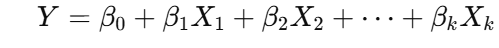

**q5.What is polynomial regression, and how does it differ from linear
regression?**


Polynomial Regression is a type of regression analysis where the relationship between the independent variable(s) and the dependent variable is modeled as an nth-degree polynomial.

It allows us to capture non-linear relationships while still being a form of linear regression in terms of parameters.


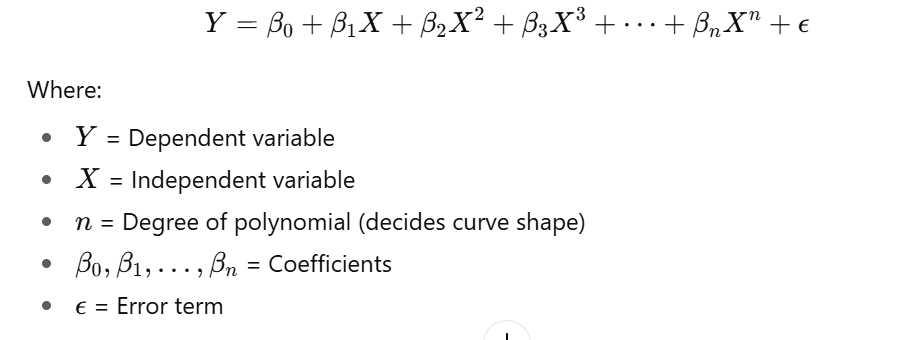



Linear regression fits a straight line.

Polynomial regression fits a curve (by adding powers of X), useful for capturing non-linear patterns.




**Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points.
(Include your Python code and output in the code box below.)**


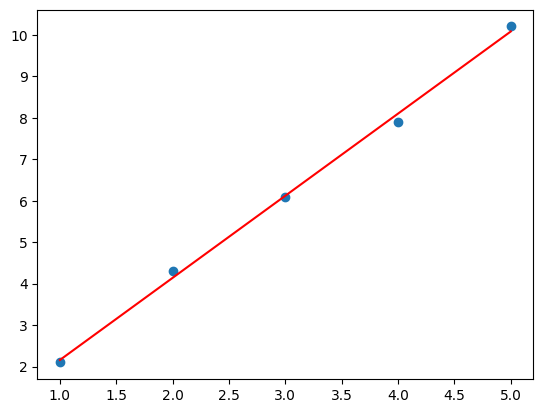

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x=[1, 2, 3, 4, 5]
y=[2.1, 4.3, 6.1, 7.9, 10.2]
x=np.array(x).reshape(-1,1)
y=np.array(y)
model=LinearRegression()
model.fit(x,y)
model.predict(x)

plt.scatter(x,y)
plt.plot(x,model.predict(x),color='red')
plt.show()

**Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.
(Include your Python code and output in the code box below.)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample data
data = {
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

# Independent and dependent variables
X = df[["Area", "Rooms"]]
y = df["Price"]

# Fit model using sklearn
model = LinearRegression()
model.fit(X, y)

# Coefficients and intercept
coef = model.coef_
intercept = model.intercept_
r2 = model.score(X, y)

# Calculate VIF
X_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print("Intercept:", intercept)
print("Coefficients:", coef)
print("R² Score:", r2)
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Intercept: 103157.89473684214
Coefficients: [   63.15789474 34736.84210526]
R² Score: 0.9985775248933144

Variance Inflation Factor (VIF):
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


array([1.98])

**Question 8: Implement polynomial regression on the following data: ● X = [1, 2, 3, 4, 5] 3 ● Y = [2.2, 4.8, 7.5, 11.2, 14.7] Fit a 2nd-degree polynomial and plot the resulting curve. (Include your Python code and output in the code box below**

Fitted Polynomial Equation: 
     2
0.2 x + 1.94 x + 0.06


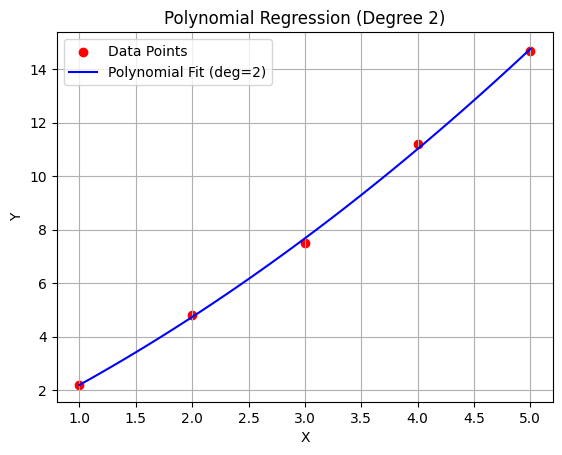

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Fit a 2nd-degree polynomial
coeffs = np.polyfit(X, Y, 2)   # returns coefficients [a, b, c] for ax^2 + bx + c
poly_eq = np.poly1d(coeffs)

# Generate predictions
X_smooth = np.linspace(min(X), max(X), 100)  # smooth curve
Y_pred = poly_eq(X_smooth)

# Print polynomial equation
print("Fitted Polynomial Equation: ")
print(poly_eq)

# Plot
plt.scatter(X, Y, color="red", label="Data Points")
plt.plot(X_smooth, Y_pred, color="blue", label="Polynomial Fit (deg=2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.grid(True)
plt.show()


Question 9: Create a residuals plot for a regression model trained on this data: ● X = [10, 20, 30, 40, 50] ● Y = [15, 35, 40, 50, 65] Assess heteroscedasticity by examining the spread of residuals.

Regression equation: Y = 1.1500000000000001 * X + 6.499999999999993


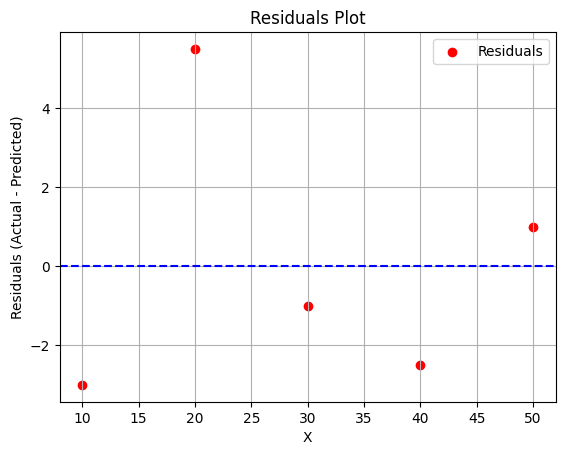

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Train linear regression model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Residuals
residuals = Y - Y_pred

# Print regression equation
print("Regression equation: Y =", model.coef_[0], "* X +", model.intercept_)

# Residual plot
plt.scatter(X, residuals, color="red", label="Residuals")
plt.axhline(y=0, color="blue", linestyle="--")  # reference line
plt.xlabel("X")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.legend()
plt.grid(True)
plt.show()


Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


In [ ]:
Heteroscedasticity:

Apply transformations like log(price) to stabilize variance.

Use Weighted Least Squares or robust regression if needed.

Multicollinearity:

Detect with correlation matrix or VIF.

Remove/combine correlated features or use regularization (Ridge/Lasso).